# Groundwater signatures

*R.A. Collenteur, University of Graz, 2022*

In this notebook we introduce the **groundwater signatures** module available in Pastas. The signatures methods can be accessed through the `signatures` module in the `pastas.stats` sub-package. This module is partly based on the work from [Heudorfer et al. (2019)](#References) and others (see [References](#References)).

Groundwater signatures characterize different aspects of a groundwater time series, and can be subdivided in different categories: shape, distribution, and structure. Groundwater signatures are also referred to as 'indices' or 'quantitative' metrics. In Pastas, 'signatures' is adopted to avoid any confusion with time indices and goodness-of-fit metrics. 

The signatures can be used to *objectively* characterize different groundwater systems, for example distinquishing between fast and slow groundwater systems. The use of signatures is common in other parts of hydrology (e.g., rainfall-runoff modeling) and can be applied in all phases of modeling (see, for example [McMillan, 2020](#References) for an overview). 

<div class="alert alert-warning">
<b>Note:</b>
The `signatures` module is still work in progress and needs further verification. Please report any issues and bugs on the Pastas GitHub repository!
</div>

In [1]:
import numpy as np
import pandas as pd
import pastas as ps

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

ps.show_versions(numba=True)

Python version: 3.8.2 (default, Mar 25 2020, 11:22:43) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version: 1.21.2
Scipy version: 1.7.3
Pandas version: 1.3.5
Pastas version: 0.20.0b
Matplotlib version: 3.5.0
numba version: 0.53.1


## 1. Load two time series with different characteristics

To illustrate the use of groundwater signatures we load two time series of hydraulic heads with visually different characteristics.

<AxesSubplot:xlabel='Date'>

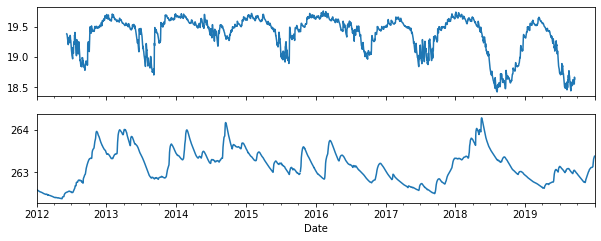

In [2]:
head1 = pd.read_csv("data_notebook_20/head_threshold.csv", index_col=0, parse_dates=True).squeeze()
head2 = pd.read_csv("data_wagna/head_wagna.csv", index_col=0, parse_dates=True, skiprows=2).squeeze()
head2 = head2.resample("D").mean().loc["2012":]

fig, [ax1, ax2] = plt.subplots(2,1, figsize=(10,4), sharex = True);

head1.plot(ax=ax1)
head2.plot(ax=ax2)

## 2. Compute signatures

To compute all available signatures at once, we can use the `stats` method from the `signatures` module. This is shown below. Alternatively, each signature can be computed with a separate method (e.g., `ps.stats.signatures.baseflow_index`).

In [3]:
sigs1 = ps.stats.signatures.summary(head1)
sigs2 = ps.stats.signatures.summary(head2)

# Create a dataframe for easy comparison and plotting
df = pd.concat([sigs1, sigs2], axis=1)
df

,0,1
cv_period_mean,0.015684,0.001481
cv_date_min,0.119795,0.352998
cv_fall_rate,-0.874055,-0.689338
cv_rise_rate,1.453789,1.416925
parde_seasonality,0.662627,0.389114
avg_seasonal_fluctuation,0.839583,0.873115
magnitude,0.072510,0.007240
interannual_variation,0.550667,1.403426
low_pulse_count,29.000000,8.000000
high_pulse_count,33.000000,11.000000


## 3. Plot the results

Depending on the signature, different ranges of parameters can be expected. We therefore split the signatures in two range for visualization purposes.

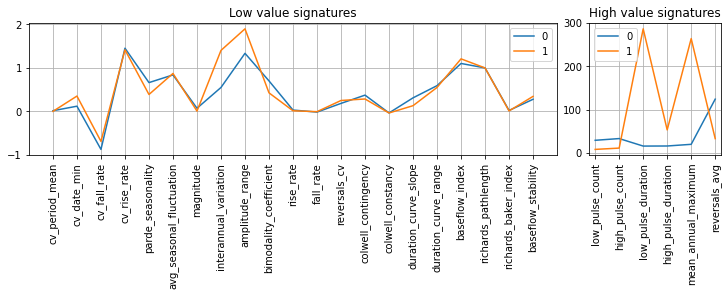

In [4]:
fig = plt.figure(constrained_layout=True, figsize=(10, 4))
gs = GridSpec(1, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :4])
ax2 = fig.add_subplot(gs[0, 4])

low_values = df.where(df < 2).dropna()
low_values.plot(ax=ax1)
ax1.set_xticks(np.arange(len(low_values)),low_values.index, rotation=90);
ax1.grid()
high_values = df.where(df > 2).dropna()
high_values.plot(ax=ax2)
ax2.set_xticks(np.arange(len(high_values)),high_values.index, rotation=90);
ax2.grid()

ax1.set_title("Low value signatures")
ax2.set_title("High value signatures");

## 4. Interpretation of signatures
The different signatures can be used to compare the different systems or characterize a single system. For example, the first head time series has a high bimodality coefficient (>0.7), indicating a bimodel distribution of the data. This makes sense, as this time series is used as an example for the non-linear threshold model (see notebook). Rather than (naively) testing all model structures, this is an example where we can potentially use a groundwater signature to identify a 'best' model structure beforehand.

Another example. The second time series is observed in a much slower groundwater system than the first. This is for example clearly visible and quantified by the different values for the 'pulse_duration', the 'recession and recovery constants', and the 'slope of the duration curves'. We could use this type of information to determine whether we should use a 'fast' or 'slow' response function (e.g., an Exponential or Gamma function). These are just some examples of how groundwater signatures can be used to improve groundwater modeling, more research on this topic is required. Please contact us if interested!

A little disclaimer: from the plot above it is actually not that straightforward to compare the indices, because the range in values is large. For example, the rise and fall rate visually show no differences, but their numbers vary by over 200%. Thus, interpretation requires some more work.  

### References
The following references are helpfull in learning about the groundwater signatures:

- Heudorfer, B., Haaf, E., Stahl, K., Barthel, R., 2019. [Index-based characterization and quantification of groundwater dynamics.](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018WR024418) Water Resources Research.
- Haaf, E., Giese, M., Heudorfer, B., Stahl, K., Barthel, R., 2020. [Physiographic and Climatic Controls on Regional Groundwater Dynamics.](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019WR026545) Water Resources Research.
- Giese, M., Haaf, E., Heudorfer, B., Barthel, R., 2020. [Comparative hydrogeology – reference analysis of groundwater dynamics from neighbouringobservation wells](https://www.tandfonline.com/doi/full/10.1080/02626667.2020.1762888) Hydrological Sciences Journal.
- McMillan, H.K., 2021. [A review of hydrologic signatures and their applications](https://wires.onlinelibrary.wiley.com/doi/10.1002/wat2.1499). WIREs Water.